In [2]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt
import logging

In [186]:
df = pd.read_csv(config.external_data_path + '/cambridge_bay_sea_ice_properties_from_ice_charts.csv', usecols=['Date', 'Total Concentration', 'Stage of Development', 'Form of Ice', 'Mean Temperature'])
df = df.rename(columns={"Total Concentration" : "total_concentration", "Stage of Development" : "stage_of_development", "Form of Ice" : "form_of_ice", "Mean Temperature" : "mean_temperature"})

df = df.replace("<1", 0.5)
df.loc[:, 'total_concentration':'mean_temperature'] = df.loc[:, 'total_concentration':'mean_temperature'].astype('float')

df['timestamp'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values('timestamp', ignore_index=True)
df

,Date,total_concentration,stage_of_development,form_of_ice,mean_temperature,timestamp
0,03/09/2018,NaN,NaN,NaN,4.9,2018-09-03
1,10/09/2018,NaN,NaN,NaN,1.0,2018-09-10
2,17/09/2018,NaN,NaN,NaN,-2.5,2018-09-17
3,24/09/2018,NaN,NaN,NaN,-4.4,2018-09-24
4,01/10/2018,1.0,NaN,NaN,-4.9,2018-10-01
5,08/10/2018,7.0,1.0,NaN,-7.7,2018-10-08
6,15/10/2018,3.0,1.0,8.0,-9.8,2018-10-15
7,22/10/2018,9.0,4.0,8.0,-14.0,2018-10-22
8,05/11/2018,9.0,4.0,8.0,-10.5,2018-11-05
9,12/11/2018,10.0,7.0,8.0,-22.6,2018-11-12


In [206]:
bad_rows = df[14:23]['stage_of_development']
df[14:23]['stage_of_development'] = bad_rows.replace(1, 11)
df

/var/folders/xw/j5fzsq4j5d5gfqy4tsdkbz0h0000gn/T/ipykernel_78894/2354310591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[14:23]['stage_of_development'] = bad_rows.replace(1, 11)


,Date,total_concentration,stage_of_development,form_of_ice,mean_temperature,timestamp
0,03/09/2018,NaN,NaN,NaN,4.9,2018-09-03
1,10/09/2018,NaN,NaN,NaN,1.0,2018-09-10
2,17/09/2018,NaN,NaN,NaN,-2.5,2018-09-17
3,24/09/2018,NaN,NaN,NaN,-4.4,2018-09-24
4,01/10/2018,1.0,NaN,NaN,-4.9,2018-10-01
5,08/10/2018,7.0,1.0,NaN,-7.7,2018-10-08
6,15/10/2018,3.0,1.0,8.0,-9.8,2018-10-15
7,22/10/2018,9.0,4.0,8.0,-14.0,2018-10-22
8,05/11/2018,9.0,4.0,8.0,-10.5,2018-11-05
9,12/11/2018,10.0,7.0,8.0,-22.6,2018-11-12


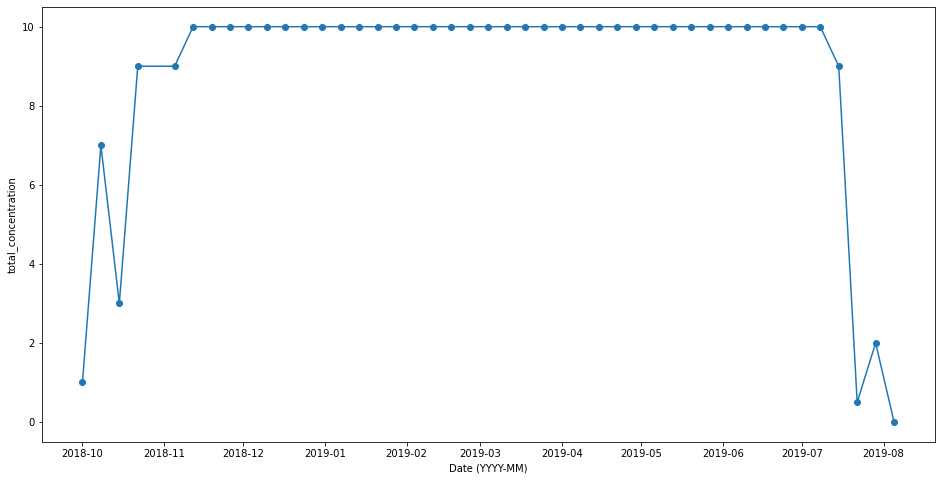

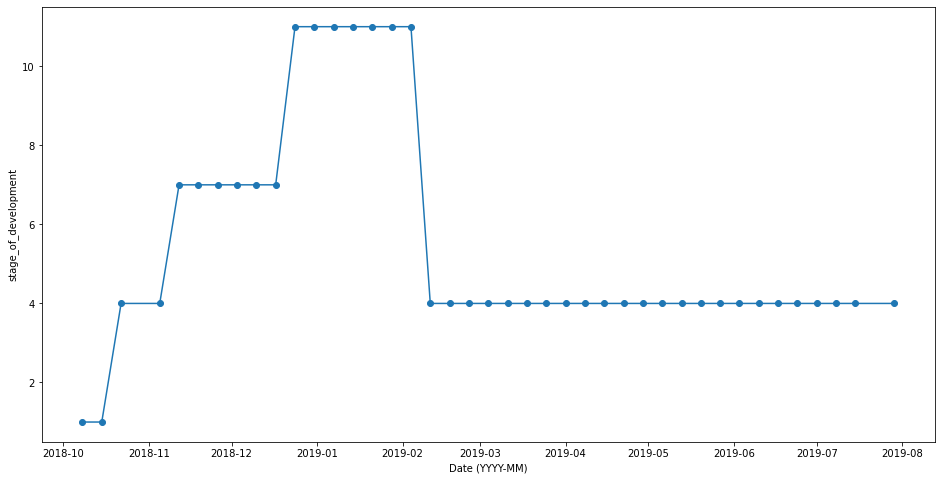

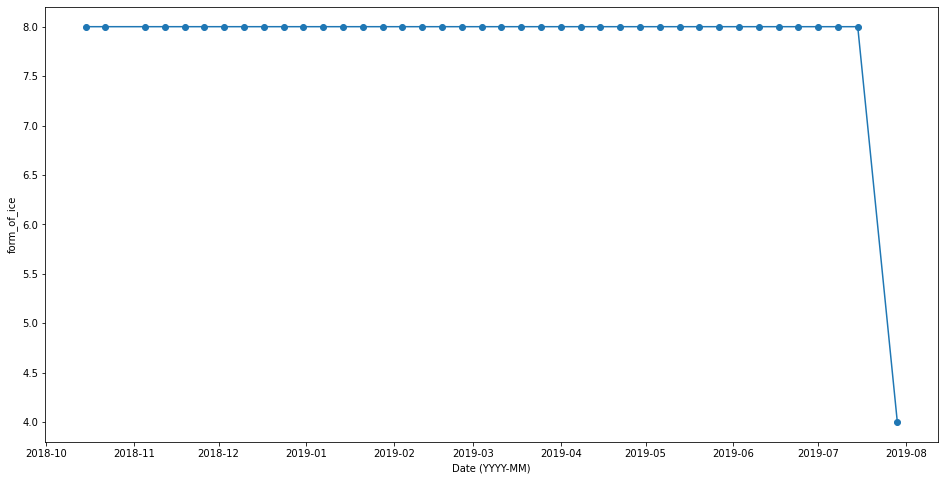

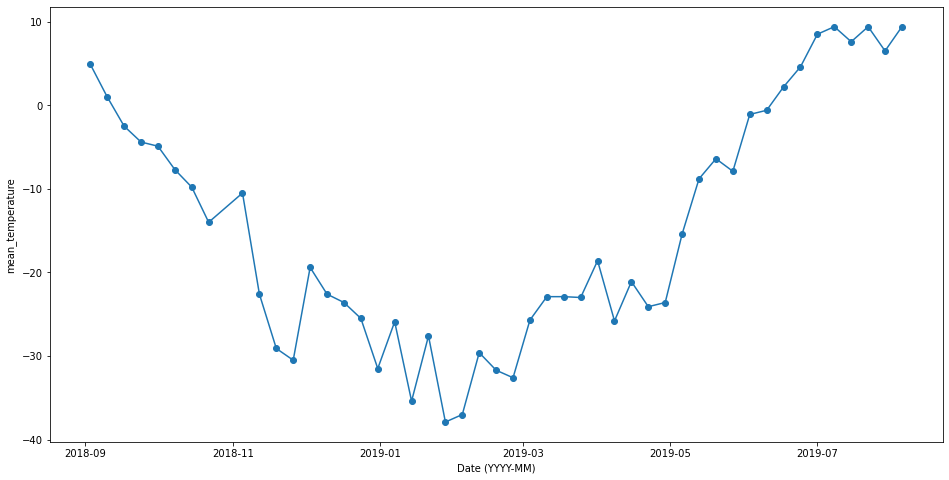

In [207]:
def plot_ice_coverage_property(df, ice_property):
    plt.figure(figsize=(16,8))
    mask = df[ice_property].notnull()
    x = df['timestamp'][mask]
    y = df[ice_property][mask]
    plt.ylabel(ice_property)
    plt.xlabel("Date (YYYY-MM)")
    plt.plot(x, y)
    plt.scatter(x, y)
    plt.show()

plot_ice_coverage_property(df, "total_concentration")
plot_ice_coverage_property(df, "stage_of_development")
plot_ice_coverage_property(df, "form_of_ice")
plot_ice_coverage_property(df, "mean_temperature")

In [153]:
colours = ["blue", "orange", "green", "red"]

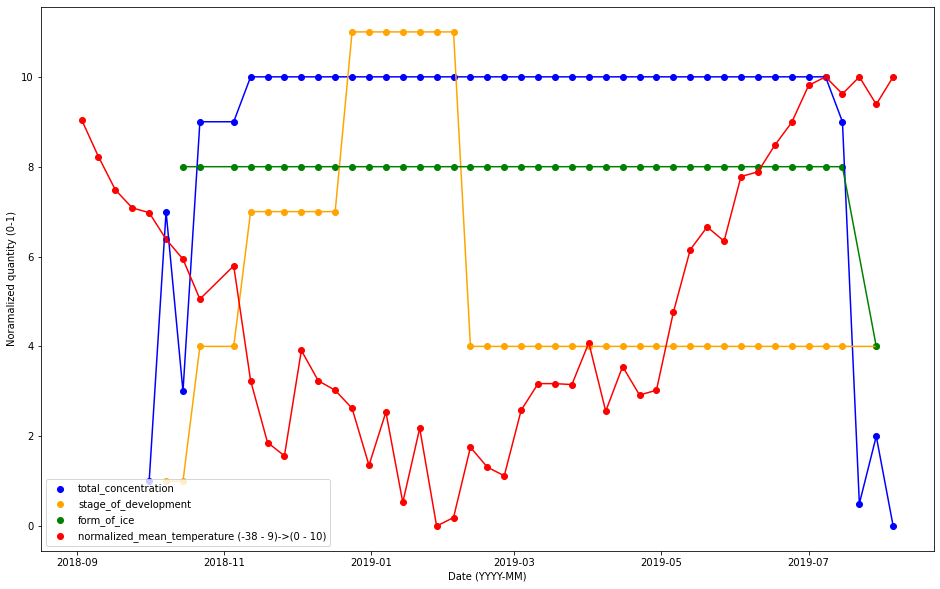

In [208]:
def plot_multiple_ice_coverage_properties_as_one_plot(df, ice_properties):
    plt.figure(figsize=(16,10))
    for i, ice_property in enumerate(ice_properties):
        mask = df[ice_property].notnull()
        x = df['timestamp'][mask]
        y = df[ice_property][mask]
        # Min-max normalization
        # https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
        if ice_property == "mean_temperature":
            y_norm = (y-y.min())/(y.max()-y.min())*10
            ice_property = f"normalized_mean_temperature ({y.min():.0f} - {y.max():.0f})->(0 - 10)"
        else:
            y_norm = y
        plt.plot(x, y_norm, c=colours[i])
        plt.scatter(x, y_norm, label=ice_property, c=colours[i])

    plt.xlabel("Date (YYYY-MM)")
    plt.ylabel("Noramalized quantity (0-1)")
    plt.legend(loc="lower left")
    figure_path = helpers.get_figure_path('multiple_ice_coverage_properties_as_one_plot', 'ice_coverage')
    plt.savefig(figure_path)
    plt.show()

ice_properties = ["total_concentration", "stage_of_development", "form_of_ice", "mean_temperature"]
plot_multiple_ice_coverage_properties_as_one_plot(df, ice_properties)

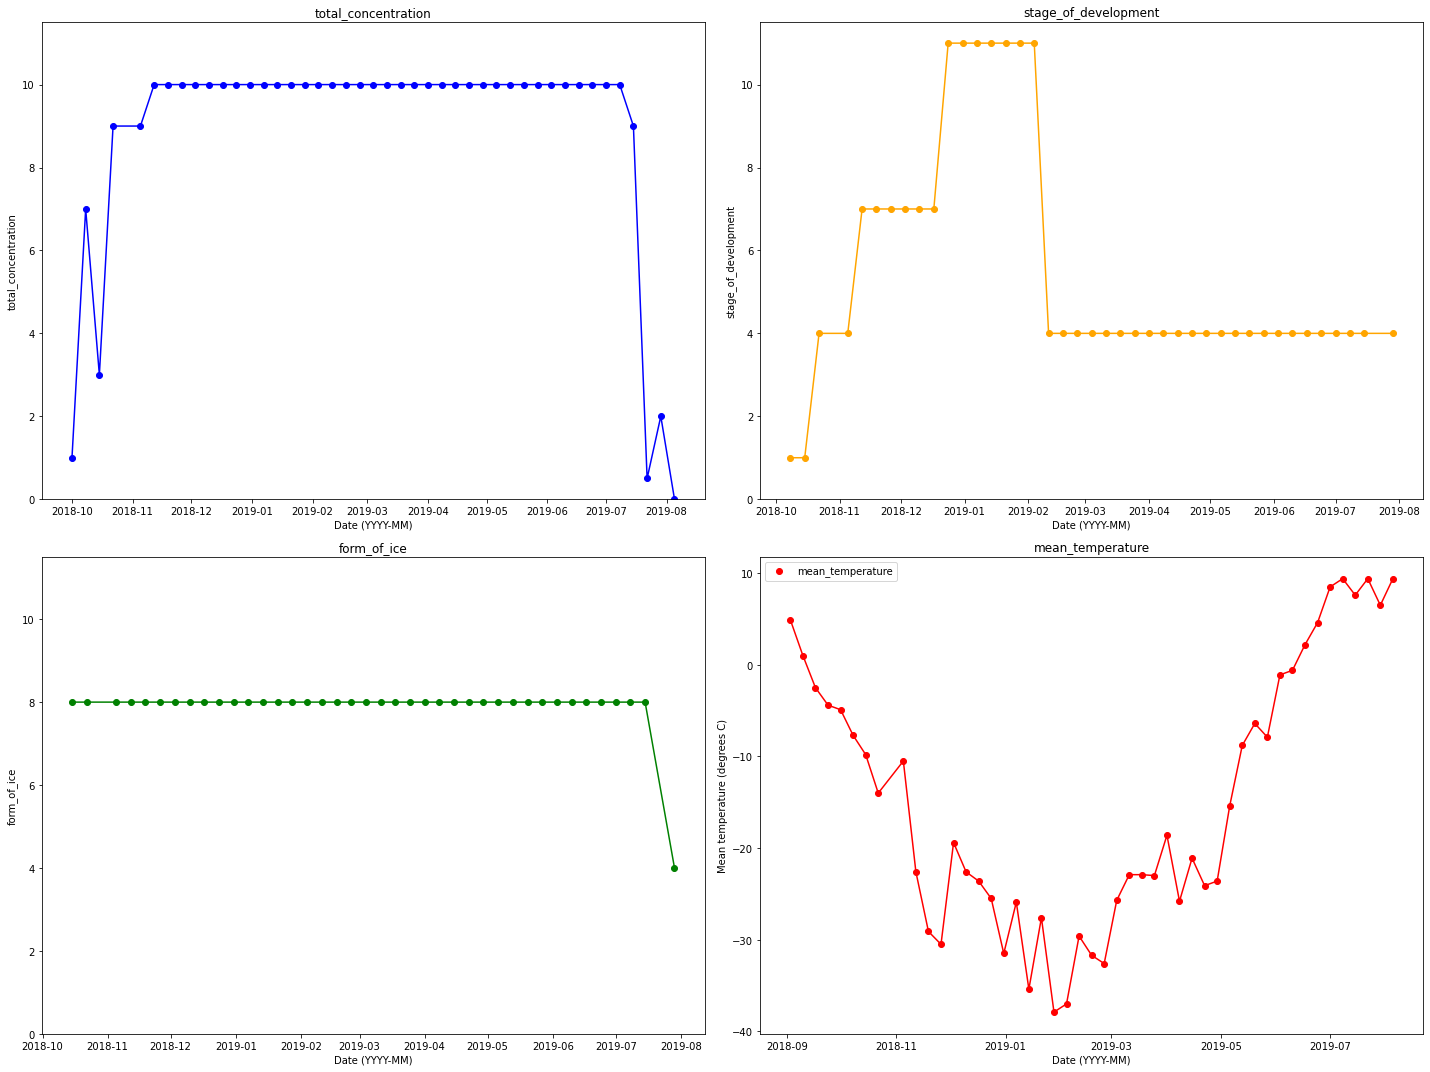

In [209]:
def plot_multiple_ice_coverage_properties_as_grid(df, ice_properties):
    fig = plt.figure(figsize=(20,15))
    for i, ice_property in enumerate(ice_properties):
        mask = df[ice_property].notnull()
        x = df['timestamp'][mask]
        y = df[ice_property][mask]
        # Min-max normalization
        # https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
        ax = fig.add_subplot(2,2,i+1)
        ax.plot(x, y, c=colours[i])
        ax.scatter(x, y, label=ice_property, c=colours[i])
        ax.set_title(ice_property)

        if ice_property == "mean_temperature":
            plt.ylabel("Mean temperature (degrees C)")
        else:
            plt.ylim(0,11.5)
            plt.ylabel(ice_property)

        plt.xlabel("Date (YYYY-MM)")
        

    plt.legend(loc="upper left")
    plt.tight_layout()
    figure_path = helpers.get_figure_path('multiple_ice_coverage_properties_as_grid', 'ice_coverage')
    plt.savefig(figure_path)
    plt.show()

ice_properties = ["total_concentration", "stage_of_development", "form_of_ice", "mean_temperature"]
plot_multiple_ice_coverage_properties_as_grid(df, ice_properties)